In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.tri as mtri
import seaborn

In [2]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry(
    fname=r'font/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe) # Matplotlib에 폰트 추가

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family': 'NanumGothic', 'font.size': 14})
# pyplot에서 '-(마이너스)'를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False 

In [5]:
iris = seaborn.load_dataset('iris')          # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic')    # 타이타닉호 데이터
tips = seaborn.load_dataset('tips')          # 팁 데이터
flights = seaborn.load_dataset('flights')    # 여객운송 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시할 수 있음

#### 1차원 실수 분포 플롯
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도 플롯, 러그 플롯을 제공함

- `rugplot()` : 데이터 위치를 x축 위에 작은 선분으로 표시(러그 플롯)  

- `kdeplot()` : 히스토그램과 비슷하지만 곡선형태로 표시 (커널 밀도 플롯)

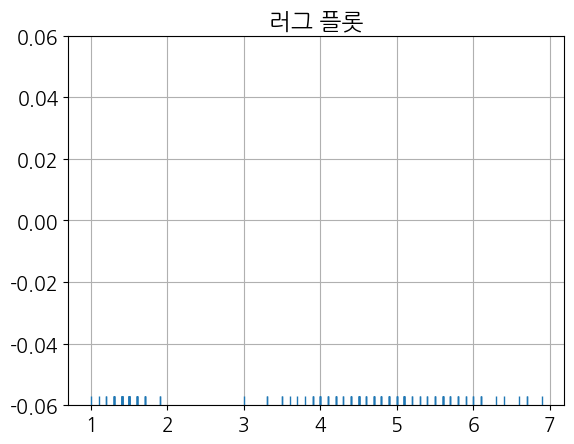

In [8]:
# Iris 데이터 중, 꽃잎의 길이에 대한 데이터
data = iris.petal_length.values 

seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

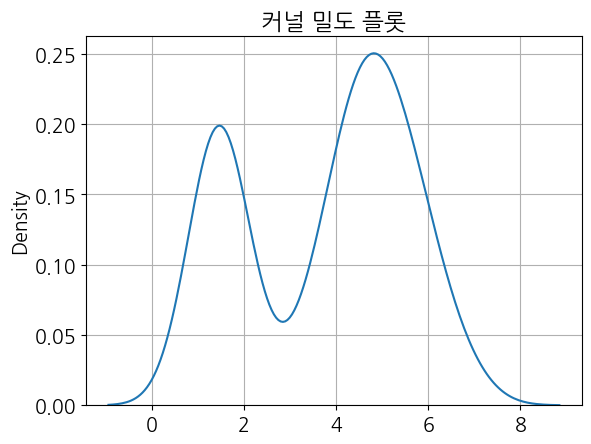

In [10]:
seaborn.kdeplot(data)
plt.title('커널 밀도 플롯')
plt.grid(True)
plt.show()

#### 카운터 플롯
seaborn 패키지의 `countplot()` 메서드로 각 카테고리 별 사이즈를 표시할 수 있음  

`countplot()` 메서드는 데이터프레임만 사용 가능  

`countplot(x = '컬럼명', data = 데이터프레임)`

In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


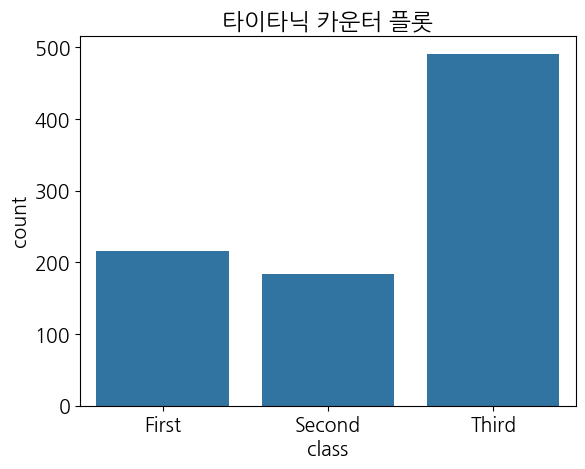

In [14]:
seaborn.countplot(x = 'class', data = titanic) # titanic 데이터 중 타이타닉호의 각 클래스별, 승객 수
plt.title('타이타닉 카운터 플롯')
plt.show()

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


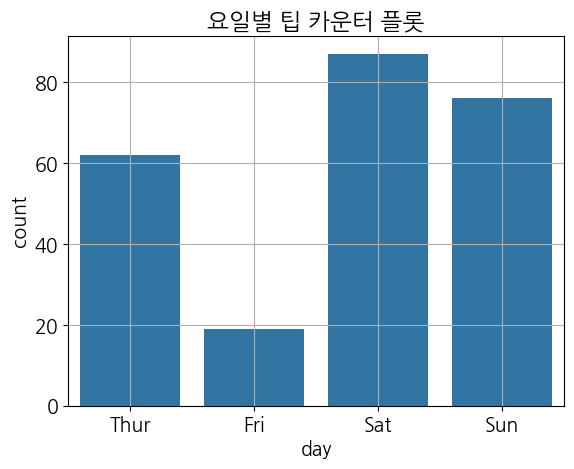

In [16]:
seaborn.countplot(x = 'day', data = tips) # tips 데이터 중 요일별 팁을 준 횟수
plt.title('요일별 팁 카운터 플롯')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지의 경우의 수를 가질 수 있음  

- 모든 데이터가 모두 실수 값인 경우
- 모든 데이터가 모두 카테고리 값인 경우
- 데이터가 실수 값과 카테고리 값이 섞여 있는 경우

#### 2차원 실수형 데이터
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현할 수 있음  

`jointplot()` : 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해 줌(데이터 프레임만 사용가능)

``` python
jointplot(
    data = dataframe, x = 'x변수가 될 데이터프레임의 열이름', 
    y = 'y변수가 될 데이터프레임의 열이름', kind = '차트의 종류'
)
```

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


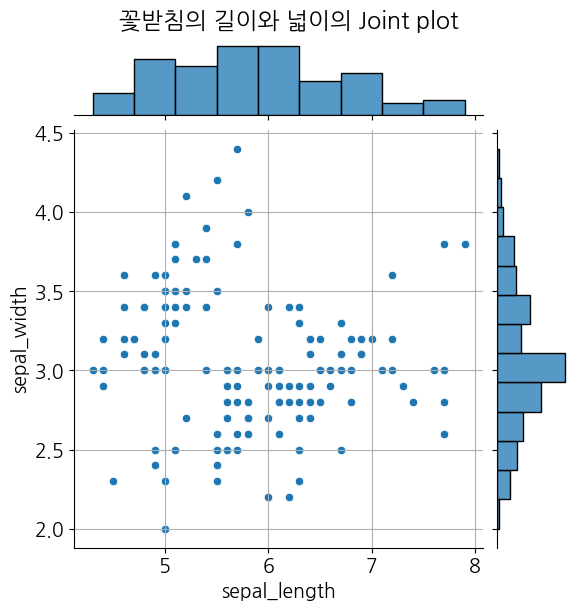

In [20]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind = 'scatter')
plt.suptitle('꽃받침의 길이와 넓이의 Joint plot', y = 1.02) # y는 타이틀과 그래프 사이의 간격 조정
plt.grid(True)
plt.show()

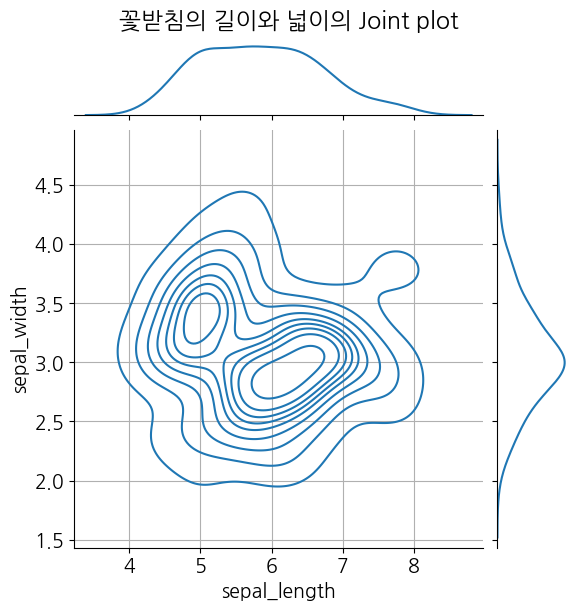

In [21]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind = 'kde')
plt.suptitle('꽃받침의 길이와 넓이의 Joint plot', y = 1.02) # y는 타이틀과 그래프 사이의 간격 조정
plt.grid(True)
plt.show()

#### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만들어줌,  

같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현

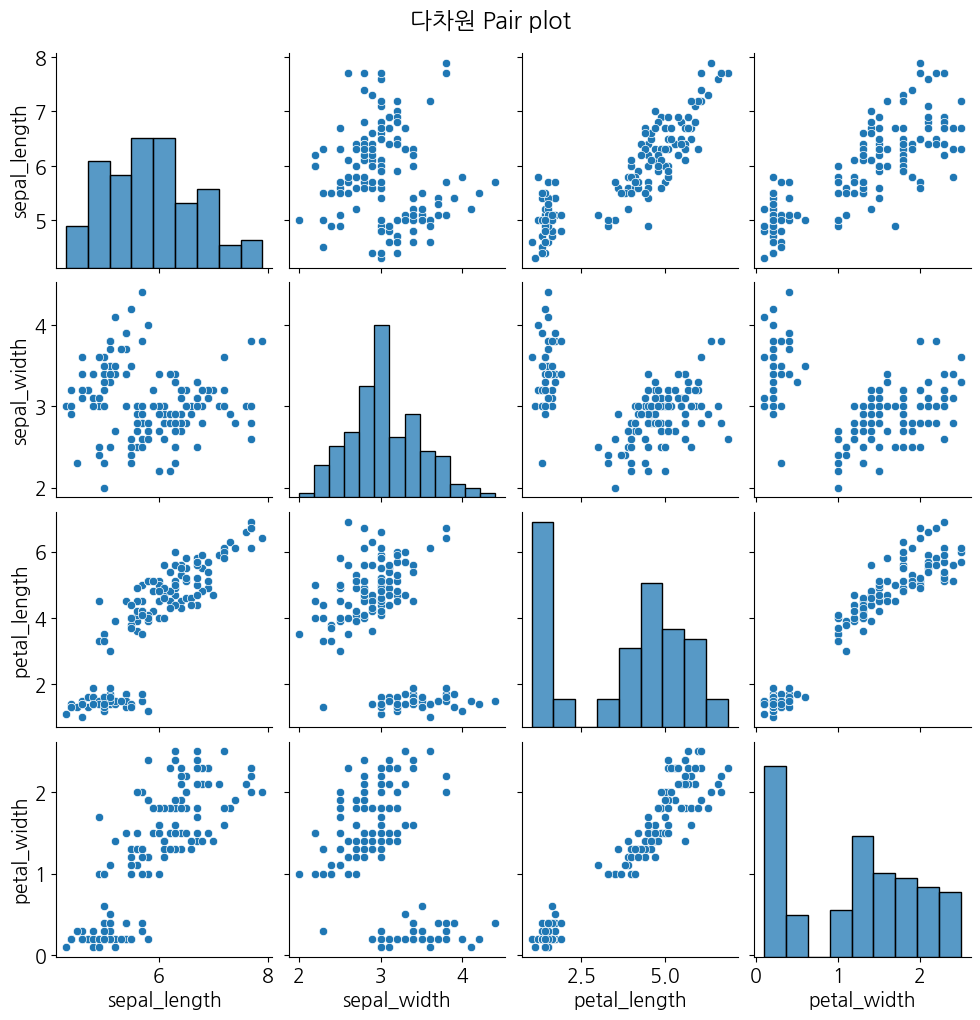

In [28]:
seaborn.pairplot(iris)
plt.suptitle('다차원 Pair plot', y = '1.02')
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 `hue` 인수에 카테고리 변수 이름을 지정함

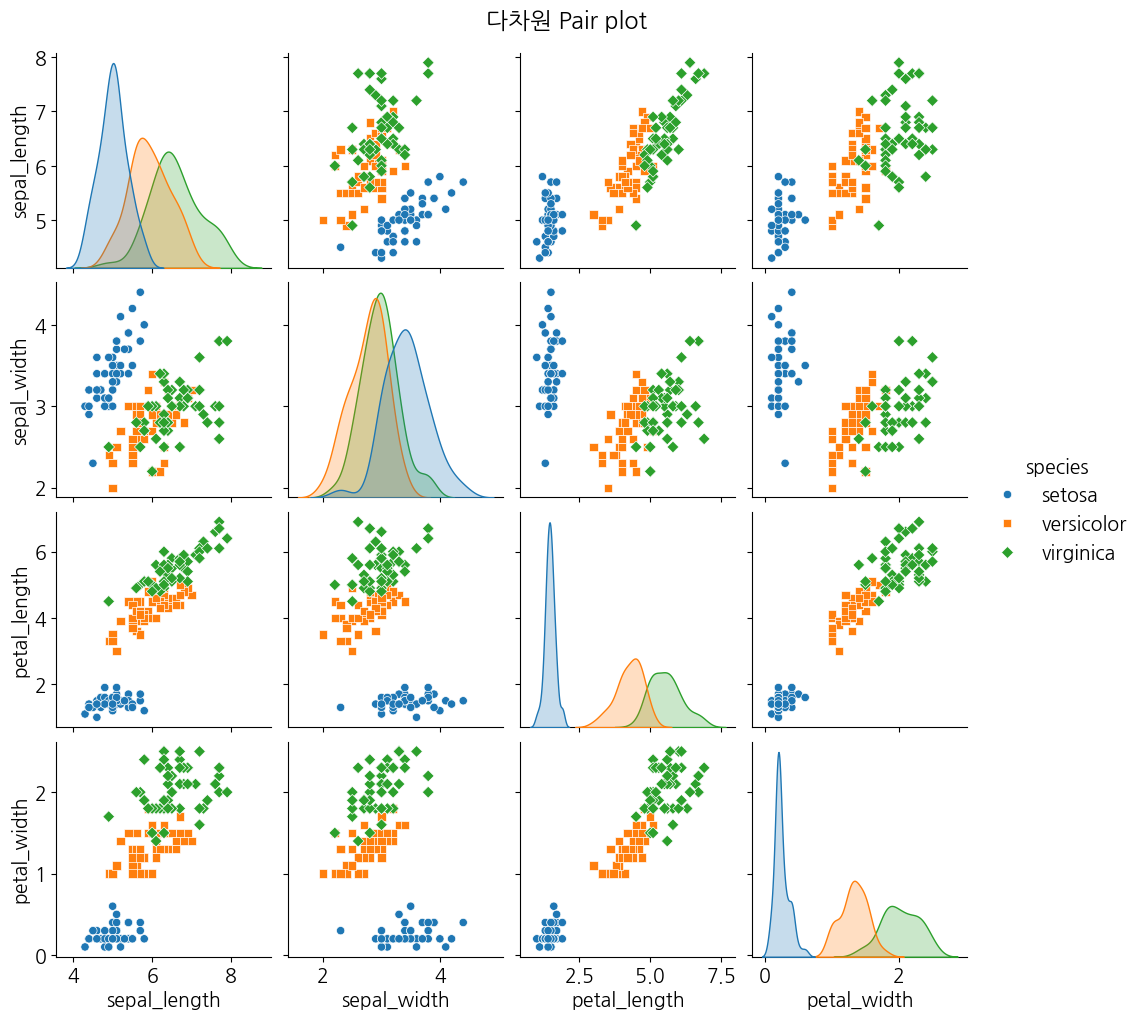

In [29]:
seaborn.pairplot(iris, hue='species', markers= ['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y = '1.02')
plt.show()